In [22]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import data
import generate_data
from generate_cayley_graph import CayleyGraphGenerator

g.num_nodes=5 g.num_edges=4 g.dim_feat=1
tensor([[0.4963],
        [0.7682],
        [0.0885],
        [0.1320],
        [0.3074]])
tensor([0.5473])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0893, 0.6754],
        [0.0000, 0.0000, 0.0893, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6754, 0.0000, 0.0000]])
returning g


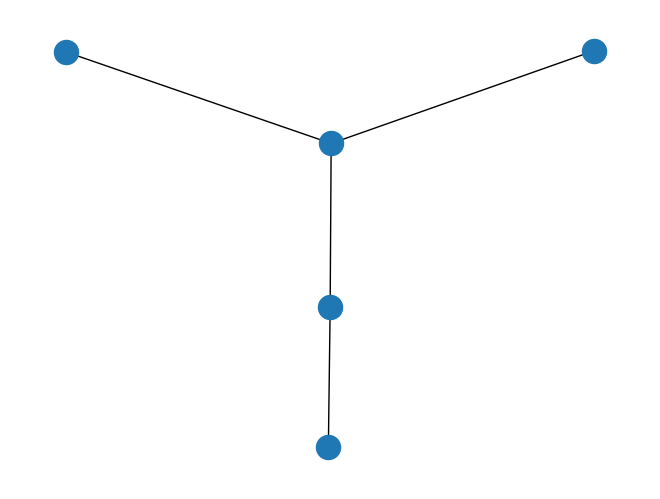

In [8]:
g = generate_data.make_dummy()

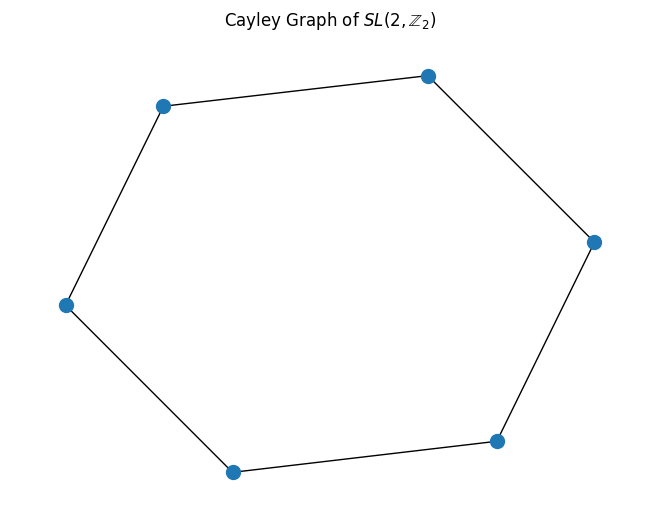

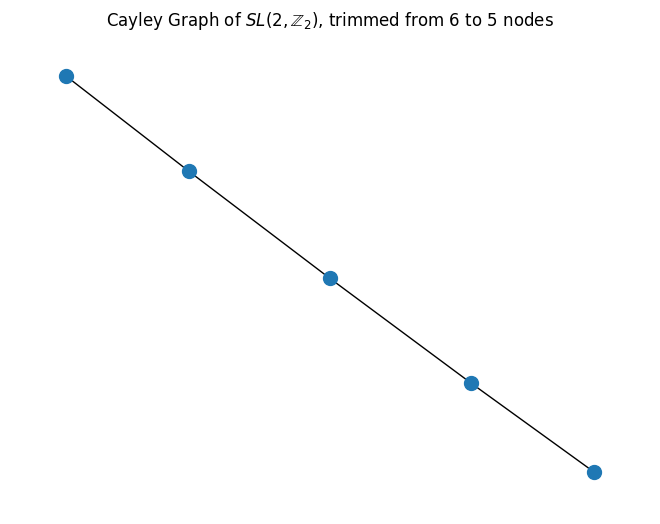

In [15]:
V = g.num_nodes

generator = CayleyGraphGenerator(V) 

generator.generate_cayley_graph() 
generator.visualize_graph(trimmed=False) 

generator.trim_graph() 
generator.visualize_graph(trimmed=True)

In [31]:
# Graph 1: the original given graph

graph_1 = g

# Graph 2: a graph with g.num_nodes nodes and g.num_edges edges as the largest elements of adjacency-matrix style g.interact_strength

graph_2 = nx.Graph(regression_target=g.data.y)

for node in range(g.num_nodes):
    graph_2.add_node(node, features=g.data.x[node])

interactions = [(i, j, g.interact_strength[i, j]) for i in range(g.num_nodes) for j in range(i+1, g.num_nodes)]

interactions_sorted = sorted(interactions, key=lambda x: x[2], reverse=True)

for i, j, strength in interactions_sorted[:g.num_edges]:
    graph_2.add_edge(i, j, weight=strength)

# Graph 3: the trimmed Cayley graph

graph_3 = generator.G

graph_3.graph['regression_target'] = g.data.y

for node, feature in enumerate(g.data.x):
    graph_3.nodes[node]['features'] = feature

# Graph 4: the trimmed Gayley graph where we ensure the top K connections in g.interact_strength are connected

graph_4 = graph_3.copy()

for i, j, strength in interactions_sorted[:g.num_edges]:
    if not graph_4.has_edge(i, j):
        graph_4.add_edge(i, j)